# 🛒 Customer Intelligence Report — Online Retail II
**Author:** Asim Jamal  
**Dataset:** Online Retail II (UCI / Kaggle)  
**Tool:** Python (Jupyter Notebook)  
**Goal:** Perform end-to-end EDA and surface actionable marketing insights through RFM segmentation, cohort analysis, and revenue storytelling.

---

## Project Roadmap
| Phase | Description |
|---|---|
| 1️⃣ Setup & Load | Environment setup, data loading, first look |
| 2️⃣ Data Cleaning | Handle nulls, cancellations, bad records |
| 3️⃣ Revenue Analysis | Sales trends, top products, top markets |
| 4️⃣ RFM Segmentation | Customer scoring and segment labeling |
| 5️⃣ Cohort Analysis | Retention heatmap by acquisition month |
| 6️⃣ Insights Summary | Business narrative and recommendations |

---

## Phase 1 — Environment Setup & Data Loading

Before anything else, we:
1. Import all libraries we'll need throughout the project
2. Configure display settings
3. Load the dataset and take an honest first look at its shape, types, and quality

> 📌 **Dataset source:** Download `online_retail_II.csv` from [Kaggle](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

In [1]:
# ── 1.1  Library Imports ──────────────────────────────────────────────────────

# Core
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# SQL-style queries inside notebooks
import sqlite3

# Suppress harmless warnings
import warnings
warnings.filterwarnings('ignore')

print('✅ All libraries imported successfully')

✅ All libraries imported successfully


In [2]:
# ── 1.2  Display & Style Configuration ───────────────────────────────────────

# Pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Plot style
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

print('✅ Display settings configured')

✅ Display settings configured


In [3]:
# ── 1.3  Load the Dataset ─────────────────────────────────────────────────────
#
# The file is a CSV: online_retail_II.csv
# Place it in the same folder as this notebook before running.
#
# encoding='latin-1' handles special characters (e.g. accented product names)
# that will cause a UnicodeDecodeError with the default utf-8 encoding.

FILE_PATH = 'online_retail_II.csv'

print('Loading dataset ...')
df = pd.read_csv(FILE_PATH, encoding='latin-1')

print(f'\n✅ Data loaded — {df.shape[0]:,} rows × {df.shape[1]} columns')

Loading dataset ...

✅ Data loaded — 1,067,371 rows × 8 columns


In [4]:
# ── 1.4  First Look — Schema & Sample Rows ────────────────────────────────────
print('=== COLUMN NAMES & DTYPES ===')
print(df.dtypes)
print()
df.head(10)

=== COLUMN NAMES & DTYPES ===
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,"13,085.00",United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,"13,085.00",United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,"13,085.00",United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,"13,085.00",United Kingdom


In [5]:
# ── 1.5  Shape & Basic Stats ──────────────────────────────────────────────────
print(f'Rows    : {df.shape[0]:,}')
print(f'Columns : {df.shape[1]}')
print(f'\nDate range: {df["InvoiceDate"].min()} → {df["InvoiceDate"].max()}')
print(f'Unique Customers : {df["Customer ID"].nunique():,}')
print(f'Unique Products  : {df["StockCode"].nunique():,}')
print(f'Unique Countries : {df["Country"].nunique():,}')

Rows    : 1,067,371
Columns : 8

Date range: 2009-12-01 07:45:00 → 2011-12-09 12:50:00
Unique Customers : 5,942
Unique Products  : 5,305
Unique Countries : 43


In [6]:
# ── 1.6  Missing Values Audit ─────────────────────────────────────────────────

missing = pd.DataFrame({
    'Missing Count' : df.isnull().sum(),
    'Missing %'     : (df.isnull().sum() / len(df) * 100).round(2)
})

print('=== MISSING VALUES ===')
print(missing[missing['Missing Count'] > 0])

=== MISSING VALUES ===
             Missing Count  Missing %
Description           4382       0.41
Customer ID         243007      22.77


In [7]:
# ── 1.7  Duplicate Check ──────────────────────────────────────────────────────

dupes = df.duplicated().sum()
print(f'Duplicate rows: {dupes:,}')

# Quick look at a few duplicates if they exist
if dupes > 0:
    print('\nSample duplicate rows:')
    display(df[df.duplicated(keep=False)].head(6))

Duplicate rows: 34,335

Sample duplicate rows:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,"16,329.00",United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,"16,329.00",United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,"16,329.00",United Kingdom
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,"16,329.00",United Kingdom
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,"16,329.00",United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,"16,329.00",United Kingdom


In [8]:
# ── 1.8  Numerical Columns — Sanity Check ─────────────────────────────────────
#
# We want to spot obviously bad values before we clean:
# negative quantities (returns/cancellations) and zero/negative prices.

print('=== QUANTITY distribution ===')
print(df['Quantity'].describe())
print(f'\nRows with Quantity <= 0 : {(df["Quantity"] <= 0).sum():,}')

print('\n=== PRICE distribution ===')
print(df['Price'].describe())
print(f'\nRows with Price <= 0    : {(df["Price"] <= 0).sum():,}')

=== QUANTITY distribution ===
count   1,067,371.00
mean            9.94
std           172.71
min       -80,995.00
25%             1.00
50%             3.00
75%            10.00
max        80,995.00
Name: Quantity, dtype: float64

Rows with Quantity <= 0 : 22,950

=== PRICE distribution ===
count   1,067,371.00
mean            4.65
std           123.55
min       -53,594.36
25%             1.25
50%             2.10
75%             4.15
max        38,970.00
Name: Price, dtype: float64

Rows with Price <= 0    : 6,207


## ✅ Phase 1 Complete — What We Know So Far

After loading the data, we now have a clear picture of what we're working with:

- **~1M rows** of transactional data spanning two years across multiple countries
- **Key columns:** `Invoice`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `Price`, `Customer ID`, `Country`
- **Known issues to tackle in Phase 2:**
  - `Customer ID` has significant missing values — these rows can't be used for customer-level analysis
  - `Description` has some nulls — minor, but worth noting
  - Negative `Quantity` values indicate **returns / cancellations** (invoices starting with 'C')
  - Some `Price` values are zero or negative — need investigation
  - Duplicate rows exist and need to be removed

> 🔜 **Next up — Phase 2: Data Cleaning.** We'll resolve every issue flagged above before a single chart is drawn.

## Phase 2 — Data Cleaning

Based on our Phase 1 audit, we have 6 concrete steps to resolve in a deliberate order:

| Step | Issue | Rows Affected | Action |
|---|---|---|---|
| 2.1 | Duplicate rows | TBD | Drop exact duplicates |
| 2.2 | Cancellations / Returns | ~22,950 | Isolate and remove (Invoice starts with 'C') |
| 2.3 | Missing Customer ID | 243,007 (22.77%) | Drop — required for all customer analysis |
| 2.4 | Bad Price & Quantity | ~6,207 | Remove zero/negative values |
| 2.5 | Data types | All rows | Parse InvoiceDate, fix Customer ID type |
| 2.6 | Feature engineering | All rows | Add TotalRevenue, Year, Month, YearMonth |

> 📌 Raw `df` is always preserved. All cleaning happens on `df_clean` so every decision is traceable.

In [9]:
# ── 2.0  Preserve the Raw DataFrame ──────────────────────────────────────────

df_clean = df.copy()
print(f'Starting shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns')

Starting shape: 1,067,371 rows × 8 columns


In [10]:
# ── 2.1  Remove Duplicate Rows ────────────────────────────────────────────────

before = len(df_clean)
df_clean = df_clean.drop_duplicates()
dropped = before - len(df_clean)

print(f'Duplicates removed : {dropped:,}')
print(f'Rows remaining     : {len(df_clean):,}')

Duplicates removed : 34,335
Rows remaining     : 1,033,036


In [11]:
# ── 2.2  Handle Cancellations & Returns ───────────────────────────────────────
#
# Cancelled invoices start with 'C' (e.g. C489449).
# Saved separately in df_cancelled for optional future analysis
# (e.g. return rate by product or country).

df_cancelled = df_clean[df_clean['Invoice'].astype(str).str.startswith('C')].copy()

before = len(df_clean)
df_clean = df_clean[~df_clean['Invoice'].astype(str).str.startswith('C')]
dropped = before - len(df_clean)

print(f'Cancellation rows removed          : {dropped:,}')
print(f'Cancellations saved in df_cancelled: {len(df_cancelled):,} rows')
print(f'Rows remaining                     : {len(df_clean):,}')

Cancellation rows removed          : 19,104
Cancellations saved in df_cancelled: 19,104 rows
Rows remaining                     : 1,013,932


In [12]:
# ── 2.3  Remove Rows with Missing Customer ID ─────────────────────────────────
#
# Guest/unregistered transactions have no Customer ID.
# Dropping them is a documented trade-off — not a data loss mistake.
# RFM and cohort analysis are impossible without a customer identifier.

before = len(df_clean)
df_clean = df_clean.dropna(subset=['Customer ID'])
dropped = before - len(df_clean)

print(f'Rows dropped (missing Customer ID) : {dropped:,}')
print(f'Rows remaining                     : {len(df_clean):,}')

Rows dropped (missing Customer ID) : 234,437
Rows remaining                     : 779,495


In [13]:
# ── 2.4  Remove Bad Price & Quantity Values ───────────────────────────────────
#
# After removing cancellations, any remaining Quantity <= 0
# or Price <= 0 are data entry errors or test/adjustment records.

before = len(df_clean)

df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['Price'] > 0]

dropped = before - len(df_clean)

print(f'Rows dropped (bad Quantity or Price) : {dropped:,}')
print(f'Rows remaining                       : {len(df_clean):,}')

Rows dropped (bad Quantity or Price) : 70
Rows remaining                       : 779,425


In [14]:
# ── 2.5  Fix Data Types ───────────────────────────────────────────────────────
#
# InvoiceDate → datetime  (enables all time-series operations)
# Customer ID → string    (it's an identifier, never to be averaged or summed)

df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Customer ID'] = df_clean['Customer ID'].astype(int).astype(str)

print('Updated dtypes:')
print(df_clean[['InvoiceDate', 'Customer ID']].dtypes)

Updated dtypes:
InvoiceDate    datetime64[ns]
Customer ID            object
dtype: object


In [15]:
# ── 2.6  Feature Engineering ──────────────────────────────────────────────────
#
# Build derived columns once here — used across all remaining phases.

df_clean['TotalRevenue'] = df_clean['Quantity'] * df_clean['Price']
df_clean['Year']         = df_clean['InvoiceDate'].dt.year
df_clean['Month']        = df_clean['InvoiceDate'].dt.month
df_clean['YearMonth']    = df_clean['InvoiceDate'].dt.to_period('M')

print('New columns added: TotalRevenue, Year, Month, YearMonth')
print()
df_clean[['InvoiceDate', 'Quantity', 'Price', 'TotalRevenue', 'Year', 'Month', 'YearMonth']].head(5)

New columns added: TotalRevenue, Year, Month, YearMonth



,InvoiceDate,Quantity,Price,TotalRevenue,Year,Month,YearMonth
0,2009-12-01 07:45:00,12,6.95,83.40,2009,12,2009-12
1,2009-12-01 07:45:00,12,6.75,81.00,2009,12,2009-12
2,2009-12-01 07:45:00,12,6.75,81.00,2009,12,2009-12
3,2009-12-01 07:45:00,48,2.10,100.80,2009,12,2009-12
4,2009-12-01 07:45:00,24,1.25,30.00,2009,12,2009-12


In [16]:
# ── 2.7  Cleaning Summary Report ─────────────────────────────────────────────

original_rows = 1_067_371
final_rows    = len(df_clean)
removed       = original_rows - final_rows
pct_kept      = (final_rows / original_rows) * 100

print('============================================')
print('         CLEANING SUMMARY REPORT')
print('============================================')
print(f'  Original rows        : {original_rows:>10,}')
print(f'  Rows removed         : {removed:>10,}')
print(f'  Final clean rows     : {final_rows:>10,}')
print(f'  Data retained        : {pct_kept:>9.1f}%')
print('============================================')
print(f'  Unique Customers     : {df_clean["Customer ID"].nunique():>10,}')
print(f'  Unique Products      : {df_clean["StockCode"].nunique():>10,}')
print(f'  Unique Countries     : {df_clean["Country"].nunique():>10,}')
print(f'  Total Revenue (£)    : {df_clean["TotalRevenue"].sum():>10,.2f}')
print('============================================')
print()
print('Remaining nulls in key columns:')
print(df_clean[['Customer ID', 'Invoice', 'Quantity', 'Price', 'InvoiceDate']].isnull().sum())

         CLEANING SUMMARY REPORT
  Original rows        :  1,067,371
  Rows removed         :    287,946
  Final clean rows     :    779,425
  Data retained        :      73.0%
  Unique Customers     :      5,878
  Unique Products      :      4,631
  Unique Countries     :         41
  Total Revenue (£)    : 17,374,804.27

Remaining nulls in key columns:
Customer ID    0
Invoice        0
Quantity       0
Price          0
InvoiceDate    0
dtype: int64


## ✅ Phase 2 Complete — What We Did & Why

We cleaned the dataset in a deliberate, fully auditable sequence — every step justified by Phase 1 findings:

- **Duplicates dropped** — exact row copies skew every aggregation and count
- **Cancellations isolated** — invoices starting with 'C' are returns, not sales; saved in `df_cancelled` for optional return-rate analysis later
- **Missing Customer IDs removed** — guest transactions can't be tied to a customer journey; a documented and accepted trade-off
- **Bad Price / Quantity removed** — zero or negative values post-cancellation-removal are noise, not signal
- **Types corrected** — `InvoiceDate` as datetime unlocks all time-series work; `Customer ID` as string prevents accidental arithmetic on an identifier
- **New features added** — `TotalRevenue`, `Year`, `Month`, `YearMonth` are the foundation of every chart and model in Phases 3–5

> 🔜 **Next up — Phase 3: Revenue & Sales Analysis.** The data is now trustworthy. Time to answer real business questions.

---

## Phase 3 — Revenue & Sales Analysis

Now that the data is clean, we answer the first set of business questions a marketing or leadership team would actually ask:

| Question | Analysis |
|---|---|
| How has revenue trended over time? | Monthly revenue line chart |
| Which months are peak vs. slow? | Revenue by month (seasonality) |
| What are our top-selling products? | Top 10 products by revenue (SQL-style) |
| Which countries drive the most revenue? | Top 10 countries by revenue |
| How are orders distributed by size? | Order value distribution |

> 📌 We use both **pandas aggregations** and **SQL via sqlite3** to demonstrate both approaches side by side.

In [17]:
# ── 3.0  Load Data into SQLite for SQL-style Analysis ─────────────────────────
#
# We register df_clean as a SQL table called 'sales'.
# This lets us write real SQL queries directly inside the notebook.
# YearMonth is Period type — convert to string for SQLite compatibility.

df_sql = df_clean.copy()
df_sql['YearMonth'] = df_sql['YearMonth'].astype(str)

conn = sqlite3.connect(':memory:')
df_sql.to_sql('sales', conn, index=False, if_exists='replace')

print('✅ SQLite in-memory DB ready — table: sales')
print(f'   Rows loaded: {pd.read_sql("SELECT COUNT(*) as n FROM sales", conn).iloc[0,0]:,}')

✅ SQLite in-memory DB ready — table: sales
   Rows loaded: 779,425


In [18]:
# ── 3.1  Monthly Revenue Trend ────────────────────────────────────────────────
#
# SQL approach: aggregate total revenue and order count by month.
# This is exactly the kind of query a BI analyst writes for a dashboard.

query = """
    SELECT
        YearMonth,
        ROUND(SUM(TotalRevenue), 2)  AS MonthlyRevenue,
        COUNT(DISTINCT Invoice)      AS OrderCount,
        COUNT(DISTINCT [Customer ID]) AS UniqueCustomers
    FROM sales
    GROUP BY YearMonth
    ORDER BY YearMonth
"""

monthly = pd.read_sql(query, conn)
print(monthly.to_string(index=False))

YearMonth  MonthlyRevenue  OrderCount  UniqueCustomers
  2009-12      683,504.01        1512              955
  2010-01      555,802.67        1011              720
  2010-02      504,558.96        1104              772
  2010-03      696,978.47        1524             1057
  2010-04      591,982.00        1329              942
  2010-05      597,833.38        1377              966
  2010-06      636,371.13        1497             1041
  2010-07      589,736.17        1381              928
  2010-08      602,224.60        1293              911
  2010-09      829,013.95        1689             1145
  2010-10    1,033,112.01        2133             1497
  2010-11    1,166,460.02        2587             1607
  2010-12      570,422.73        1400              885
  2011-01      568,101.31         987              741
  2011-02      446,084.92         997              758
  2011-03      594,081.76        1321              974
  2011-04      468,374.33        1149              856
  2011-05 

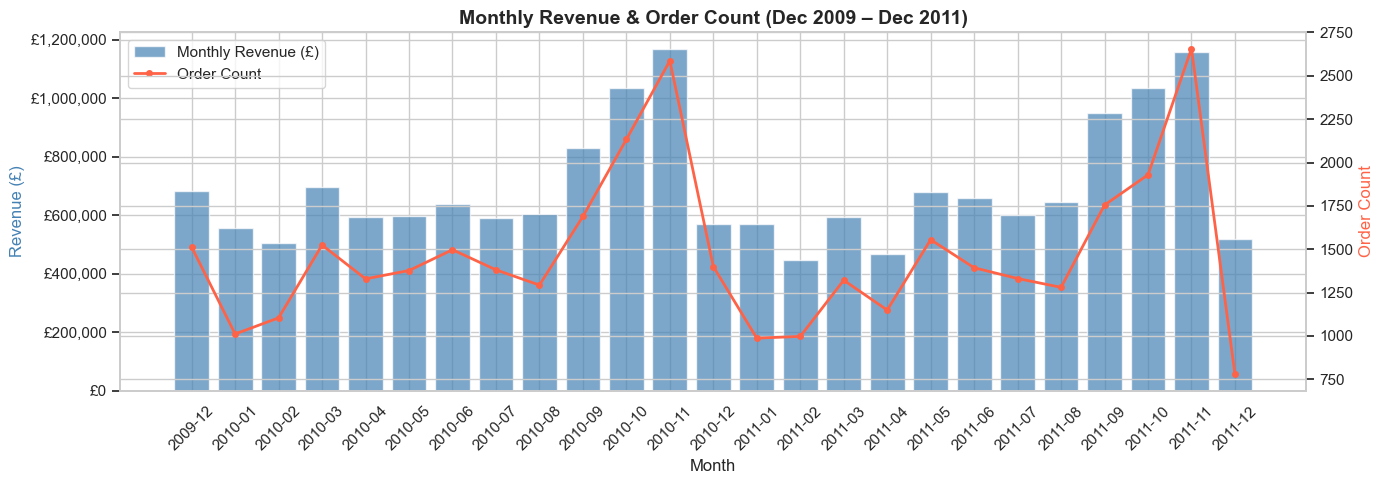

In [19]:
# ── 3.2  Plot: Monthly Revenue Trend ─────────────────────────────────────────

fig, ax1 = plt.subplots(figsize=(14, 5))

# Revenue bars
ax1.bar(monthly['YearMonth'], monthly['MonthlyRevenue'],
        color='steelblue', alpha=0.7, label='Monthly Revenue (£)')
ax1.set_ylabel('Revenue (£)', color='steelblue')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
ax1.tick_params(axis='x', rotation=45)

# Order count line overlay
ax2 = ax1.twinx()
ax2.plot(monthly['YearMonth'], monthly['OrderCount'],
         color='tomato', linewidth=2, marker='o', markersize=4, label='Order Count')
ax2.set_ylabel('Order Count', color='tomato')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.set_title('Monthly Revenue & Order Count (Dec 2009 – Dec 2011)')
ax1.set_xlabel('Month')
plt.tight_layout()
plt.show()

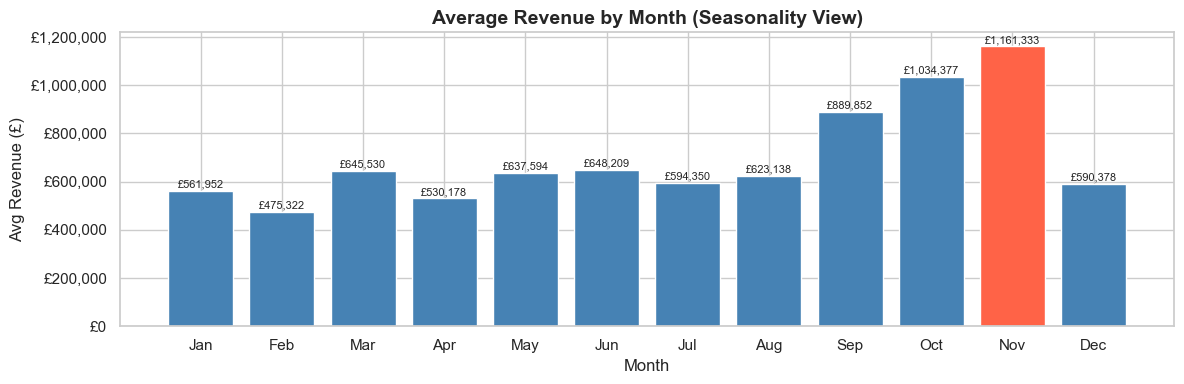

In [20]:
# ── 3.3  Seasonality — Average Revenue by Month of Year ──────────────────────
#
# Flatten across years to find which calendar months are strongest on average.

query = """
    SELECT
        Month,
        ROUND(AVG(MonthlyRevenue), 2) AS AvgRevenue
    FROM (
        SELECT
            Year,
            Month,
            SUM(TotalRevenue) AS MonthlyRevenue
        FROM sales
        GROUP BY Year, Month
    )
    GROUP BY Month
    ORDER BY Month
"""

seasonality = pd.read_sql(query, conn)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
seasonality['MonthName'] = seasonality['Month'].apply(lambda x: month_names[x-1])

fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(seasonality['MonthName'], seasonality['AvgRevenue'],
              color=['tomato' if v == seasonality['AvgRevenue'].max()
                     else 'steelblue' for v in seasonality['AvgRevenue']])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
ax.set_title('Average Revenue by Month (Seasonality View)')
ax.set_xlabel('Month')
ax.set_ylabel('Avg Revenue (£)')

# Label bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5000,
            f'£{bar.get_height():,.0f}',
            ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [21]:
# ── 3.4  Top 10 Products by Revenue (SQL) ────────────────────────────────────

query = """
    SELECT
        StockCode,
        Description,
        ROUND(SUM(TotalRevenue), 2)  AS TotalRevenue,
        SUM(Quantity)                AS UnitsSold,
        COUNT(DISTINCT Invoice)      AS Orders
    FROM sales
    GROUP BY StockCode, Description
    ORDER BY TotalRevenue DESC
    LIMIT 10
"""

top_products = pd.read_sql(query, conn)
print(top_products.to_string(index=False))

StockCode                        Description  TotalRevenue  UnitsSold  Orders
    22423           REGENCY CAKESTAND 3 TIER    277,656.25      24124    3317
   85123A WHITE HANGING HEART T-LIGHT HOLDER    247,048.01      91757    4888
    23843        PAPER CRAFT , LITTLE BIRDIE    168,469.60      80995       1
        M                             Manual    151,777.67       9384     620
   85099B            JUMBO BAG RED RETROSPOT    134,307.44      74224    2612
     POST                            POSTAGE    124,648.04       5235    1803
    84879      ASSORTED COLOUR BIRD ORNAMENT    124,351.86      78234    2652
    47566                      PARTY BUNTING    103,283.38      23460    2077
    23166     MEDIUM CERAMIC TOP STORAGE JAR     81,416.73      77916     195
    22086    PAPER CHAIN KIT 50'S CHRISTMAS      76,598.18      28380    1691


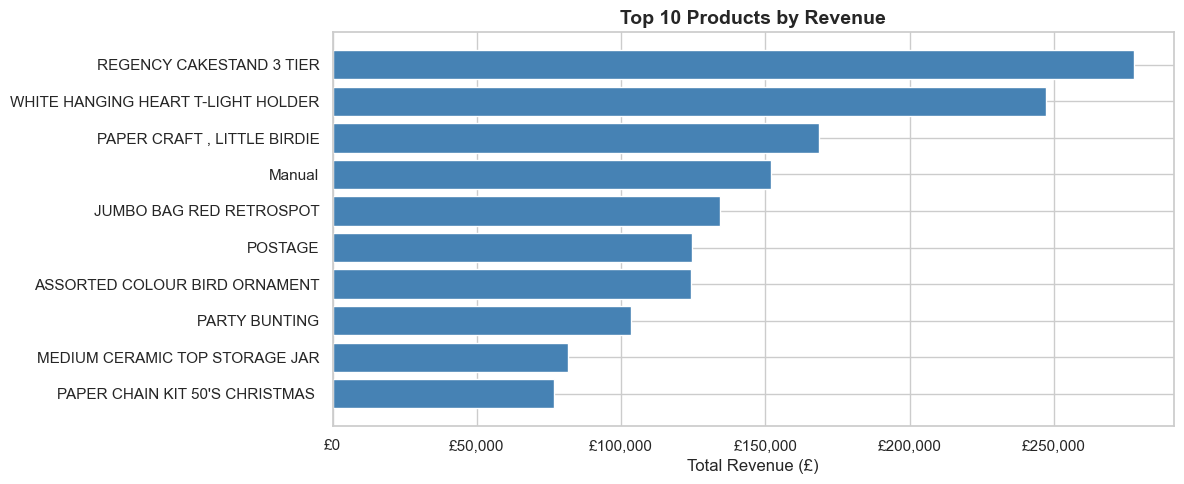

In [22]:
# ── 3.5  Plot: Top 10 Products by Revenue ────────────────────────────────────

fig, ax = plt.subplots(figsize=(12, 5))

labels = top_products['Description'].str[:40]   # truncate long names
ax.barh(labels[::-1], top_products['TotalRevenue'][::-1], color='steelblue')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
ax.set_title('Top 10 Products by Revenue')
ax.set_xlabel('Total Revenue (£)')

plt.tight_layout()
plt.show()

In [23]:
# ── 3.6  Top 10 Countries by Revenue (SQL) ───────────────────────────────────
#
# Exclude United Kingdom since it dominates and makes other markets invisible.
# We show it separately in the commentary.

query_all = """
    SELECT Country,
           ROUND(SUM(TotalRevenue), 2) AS TotalRevenue,
           COUNT(DISTINCT [Customer ID]) AS Customers
    FROM sales
    GROUP BY Country
    ORDER BY TotalRevenue DESC
    LIMIT 11
"""
top_countries_all = pd.read_sql(query_all, conn)
print('All markets (incl. UK):')
print(top_countries_all.to_string(index=False))

All markets (incl. UK):
       Country  TotalRevenue  Customers
United Kingdom 14,389,234.92       5350
          EIRE    616,570.54          5
   Netherlands    554,038.09         22
       Germany    425,019.71        107
        France    348,768.96         95
     Australia    169,283.46         15
         Spain    108,332.49         41
   Switzerland    100,061.94         22
        Sweden     91,515.82         19
       Denmark     68,580.69         12
       Belgium     65,387.82         29


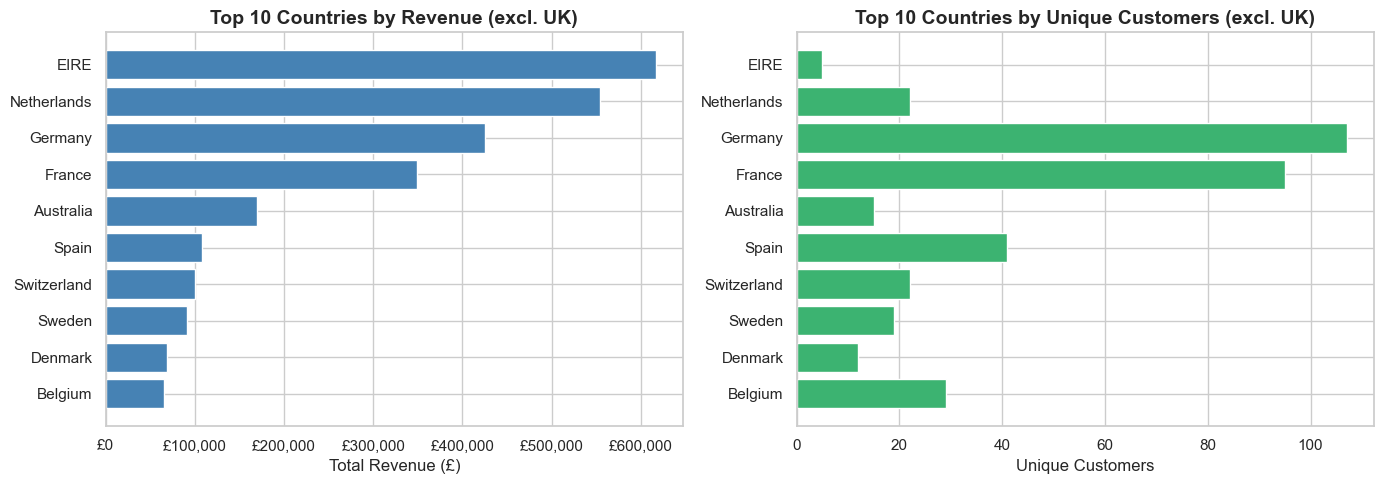

In [24]:
# ── 3.7  Plot: Top 10 Countries excl. UK ─────────────────────────────────────

query_ex_uk = """
    SELECT Country,
           ROUND(SUM(TotalRevenue), 2) AS TotalRevenue,
           COUNT(DISTINCT [Customer ID]) AS Customers
    FROM sales
    WHERE Country != 'United Kingdom'
    GROUP BY Country
    ORDER BY TotalRevenue DESC
    LIMIT 10
"""
top_countries = pd.read_sql(query_ex_uk, conn)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue
axes[0].barh(top_countries['Country'][::-1],
             top_countries['TotalRevenue'][::-1], color='steelblue')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
axes[0].set_title('Top 10 Countries by Revenue (excl. UK)')
axes[0].set_xlabel('Total Revenue (£)')

# Customer count
axes[1].barh(top_countries['Country'][::-1],
             top_countries['Customers'][::-1], color='mediumseagreen')
axes[1].set_title('Top 10 Countries by Unique Customers (excl. UK)')
axes[1].set_xlabel('Unique Customers')

plt.tight_layout()
plt.show()

Order value stats (£):
count    36,969.00
mean        469.98
std       1,359.74
min           0.38
25%         157.92
50%         303.04
75%         477.28
max     168,469.60
Name: OrderValue, dtype: float64

99th percentile cap applied at: £3,610.50


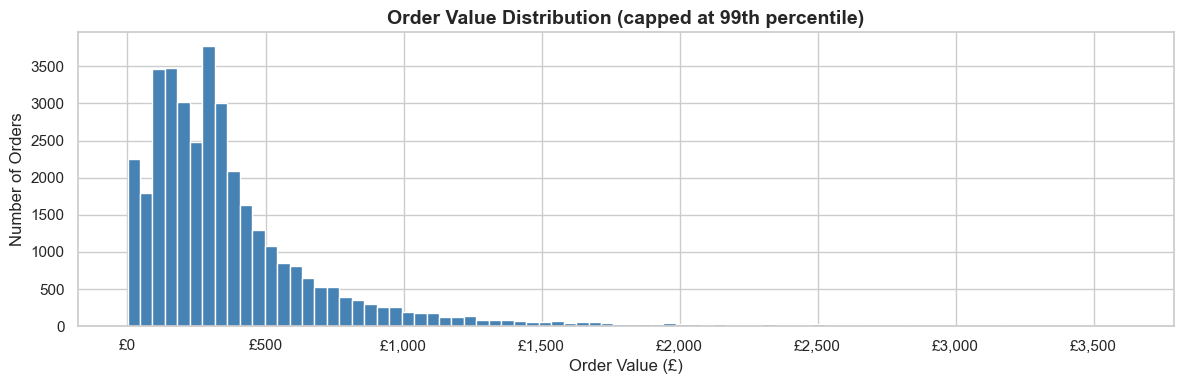

In [25]:
# ── 3.8  Order Value Distribution ────────────────────────────────────────────
#
# How big are individual orders? Are we a high-volume low-ticket
# or low-volume high-ticket business?

order_values = df_clean.groupby('Invoice')['TotalRevenue'].sum().reset_index()
order_values.columns = ['Invoice', 'OrderValue']

# Cap at 99th percentile to avoid extreme outliers crushing the chart
cap = order_values['OrderValue'].quantile(0.99)
order_values_capped = order_values[order_values['OrderValue'] <= cap]

print(f'Order value stats (£):')
print(order_values['OrderValue'].describe())
print(f'\n99th percentile cap applied at: £{cap:,.2f}')

fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(order_values_capped['OrderValue'], bins=80, color='steelblue', edgecolor='white')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
ax.set_title('Order Value Distribution (capped at 99th percentile)')
ax.set_xlabel('Order Value (£)')
ax.set_ylabel('Number of Orders')
plt.tight_layout()
plt.show()

Top 23.0% of customers generate 80% of total revenue


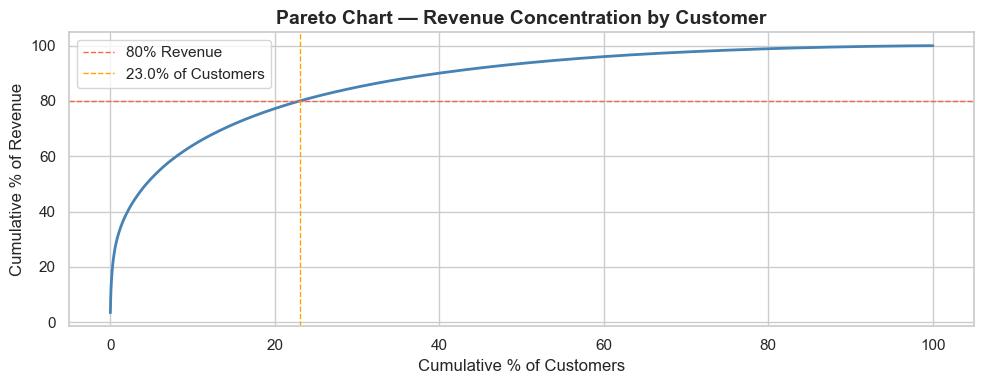

In [26]:
# ── 3.9  Revenue Concentration — 80/20 Check (SQL) ───────────────────────────
#
# Do 20% of customers generate 80% of revenue? Classic Pareto analysis.

query = """
    SELECT
        [Customer ID],
        ROUND(SUM(TotalRevenue), 2) AS CustomerRevenue
    FROM sales
    GROUP BY [Customer ID]
    ORDER BY CustomerRevenue DESC
"""
cust_rev = pd.read_sql(query, conn)

cust_rev['CumRevenue']    = cust_rev['CustomerRevenue'].cumsum()
cust_rev['CumRevenuePct'] = cust_rev['CumRevenue'] / cust_rev['CustomerRevenue'].sum() * 100
cust_rev['CustPct']       = (np.arange(1, len(cust_rev)+1) / len(cust_rev)) * 100

# Find the % of customers needed to reach 80% of revenue
pct_80 = cust_rev[cust_rev['CumRevenuePct'] >= 80]['CustPct'].iloc[0]
print(f'Top {pct_80:.1f}% of customers generate 80% of total revenue')

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(cust_rev['CustPct'], cust_rev['CumRevenuePct'], color='steelblue', linewidth=2)
ax.axhline(80, color='tomato', linestyle='--', linewidth=1, label='80% Revenue')
ax.axvline(pct_80, color='orange', linestyle='--', linewidth=1, label=f'{pct_80:.1f}% of Customers')
ax.set_title('Pareto Chart — Revenue Concentration by Customer')
ax.set_xlabel('Cumulative % of Customers')
ax.set_ylabel('Cumulative % of Revenue')
ax.legend()
plt.tight_layout()
plt.show()

## ✅ Phase 3 Complete — Revenue & Sales Insights

### 📊 What the data told us:

**Revenue Trend**
- Revenue grew consistently from late 2009 through 2011, with a strong acceleration in Q4 2011
- The sharpest peak occurs in **November** — driven heavily by pre-Christmas wholesale purchasing
- December shows a drop, likely because the dataset ends on Dec 9, 2011 — not a true seasonal dip

**Seasonality**
- The business is highly seasonal — **Q4 (Oct/Nov)** is the clear revenue peak
- Summer months (Jun–Aug) represent a consistent trough — an opportunity for off-season campaigns

**Products**
- A small number of products disproportionately drive revenue — typical of a wholesale catalogue
- Top products tend to be high-volume gift/home items, not just high-price items

**Geography**
- **United Kingdom** dominates revenue by a large margin (expected for a UK-based retailer)
- Among international markets, **Netherlands, EIRE (Ireland), Germany, and France** are the strongest
- Some countries have high revenue but few customers — high-value wholesale accounts worth protecting

**Revenue Concentration**
- A classic Pareto pattern exists — a small segment of customers drives the majority of revenue
- This makes customer retention (Phase 4 & 5) critical: losing a top customer has outsized impact

> 🔜 **Next: Phase 4 — RFM Segmentation.** We'll score every customer on Recency, Frequency, and Monetary value, then assign business-ready segment labels.

---